In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
data = pd.read_csv('cirrhosis.csv')

In [4]:
data.dropna(inplace=True)

In [5]:
print(data.describe())

               ID       N_Days           Age   Bilirubin  Cholesterol  \
count  276.000000   276.000000    276.000000  276.000000   276.000000   
mean   158.615942  1979.166667  18189.326087    3.333696   371.260870   
std     91.662926  1112.380295   3843.555619    4.601074   234.788363   
min      1.000000    41.000000   9598.000000    0.300000   120.000000   
25%     79.750000  1185.750000  15162.500000    0.800000   249.500000   
50%    157.500000  1788.000000  18156.500000    1.400000   310.000000   
75%    240.250000  2689.750000  20667.500000    3.525000   401.000000   
max    312.000000  4556.000000  28650.000000   28.000000  1775.000000   

          Albumin      Copper      Alk_Phos        SGOT  Tryglicerides  \
count  276.000000  276.000000    276.000000  276.000000     276.000000   
mean     3.516812  100.768116   1996.611594  124.119239     124.978261   
std      0.404789   88.268746   2115.477894   56.719952      65.280761   
min      1.960000    4.000000    289.000000   

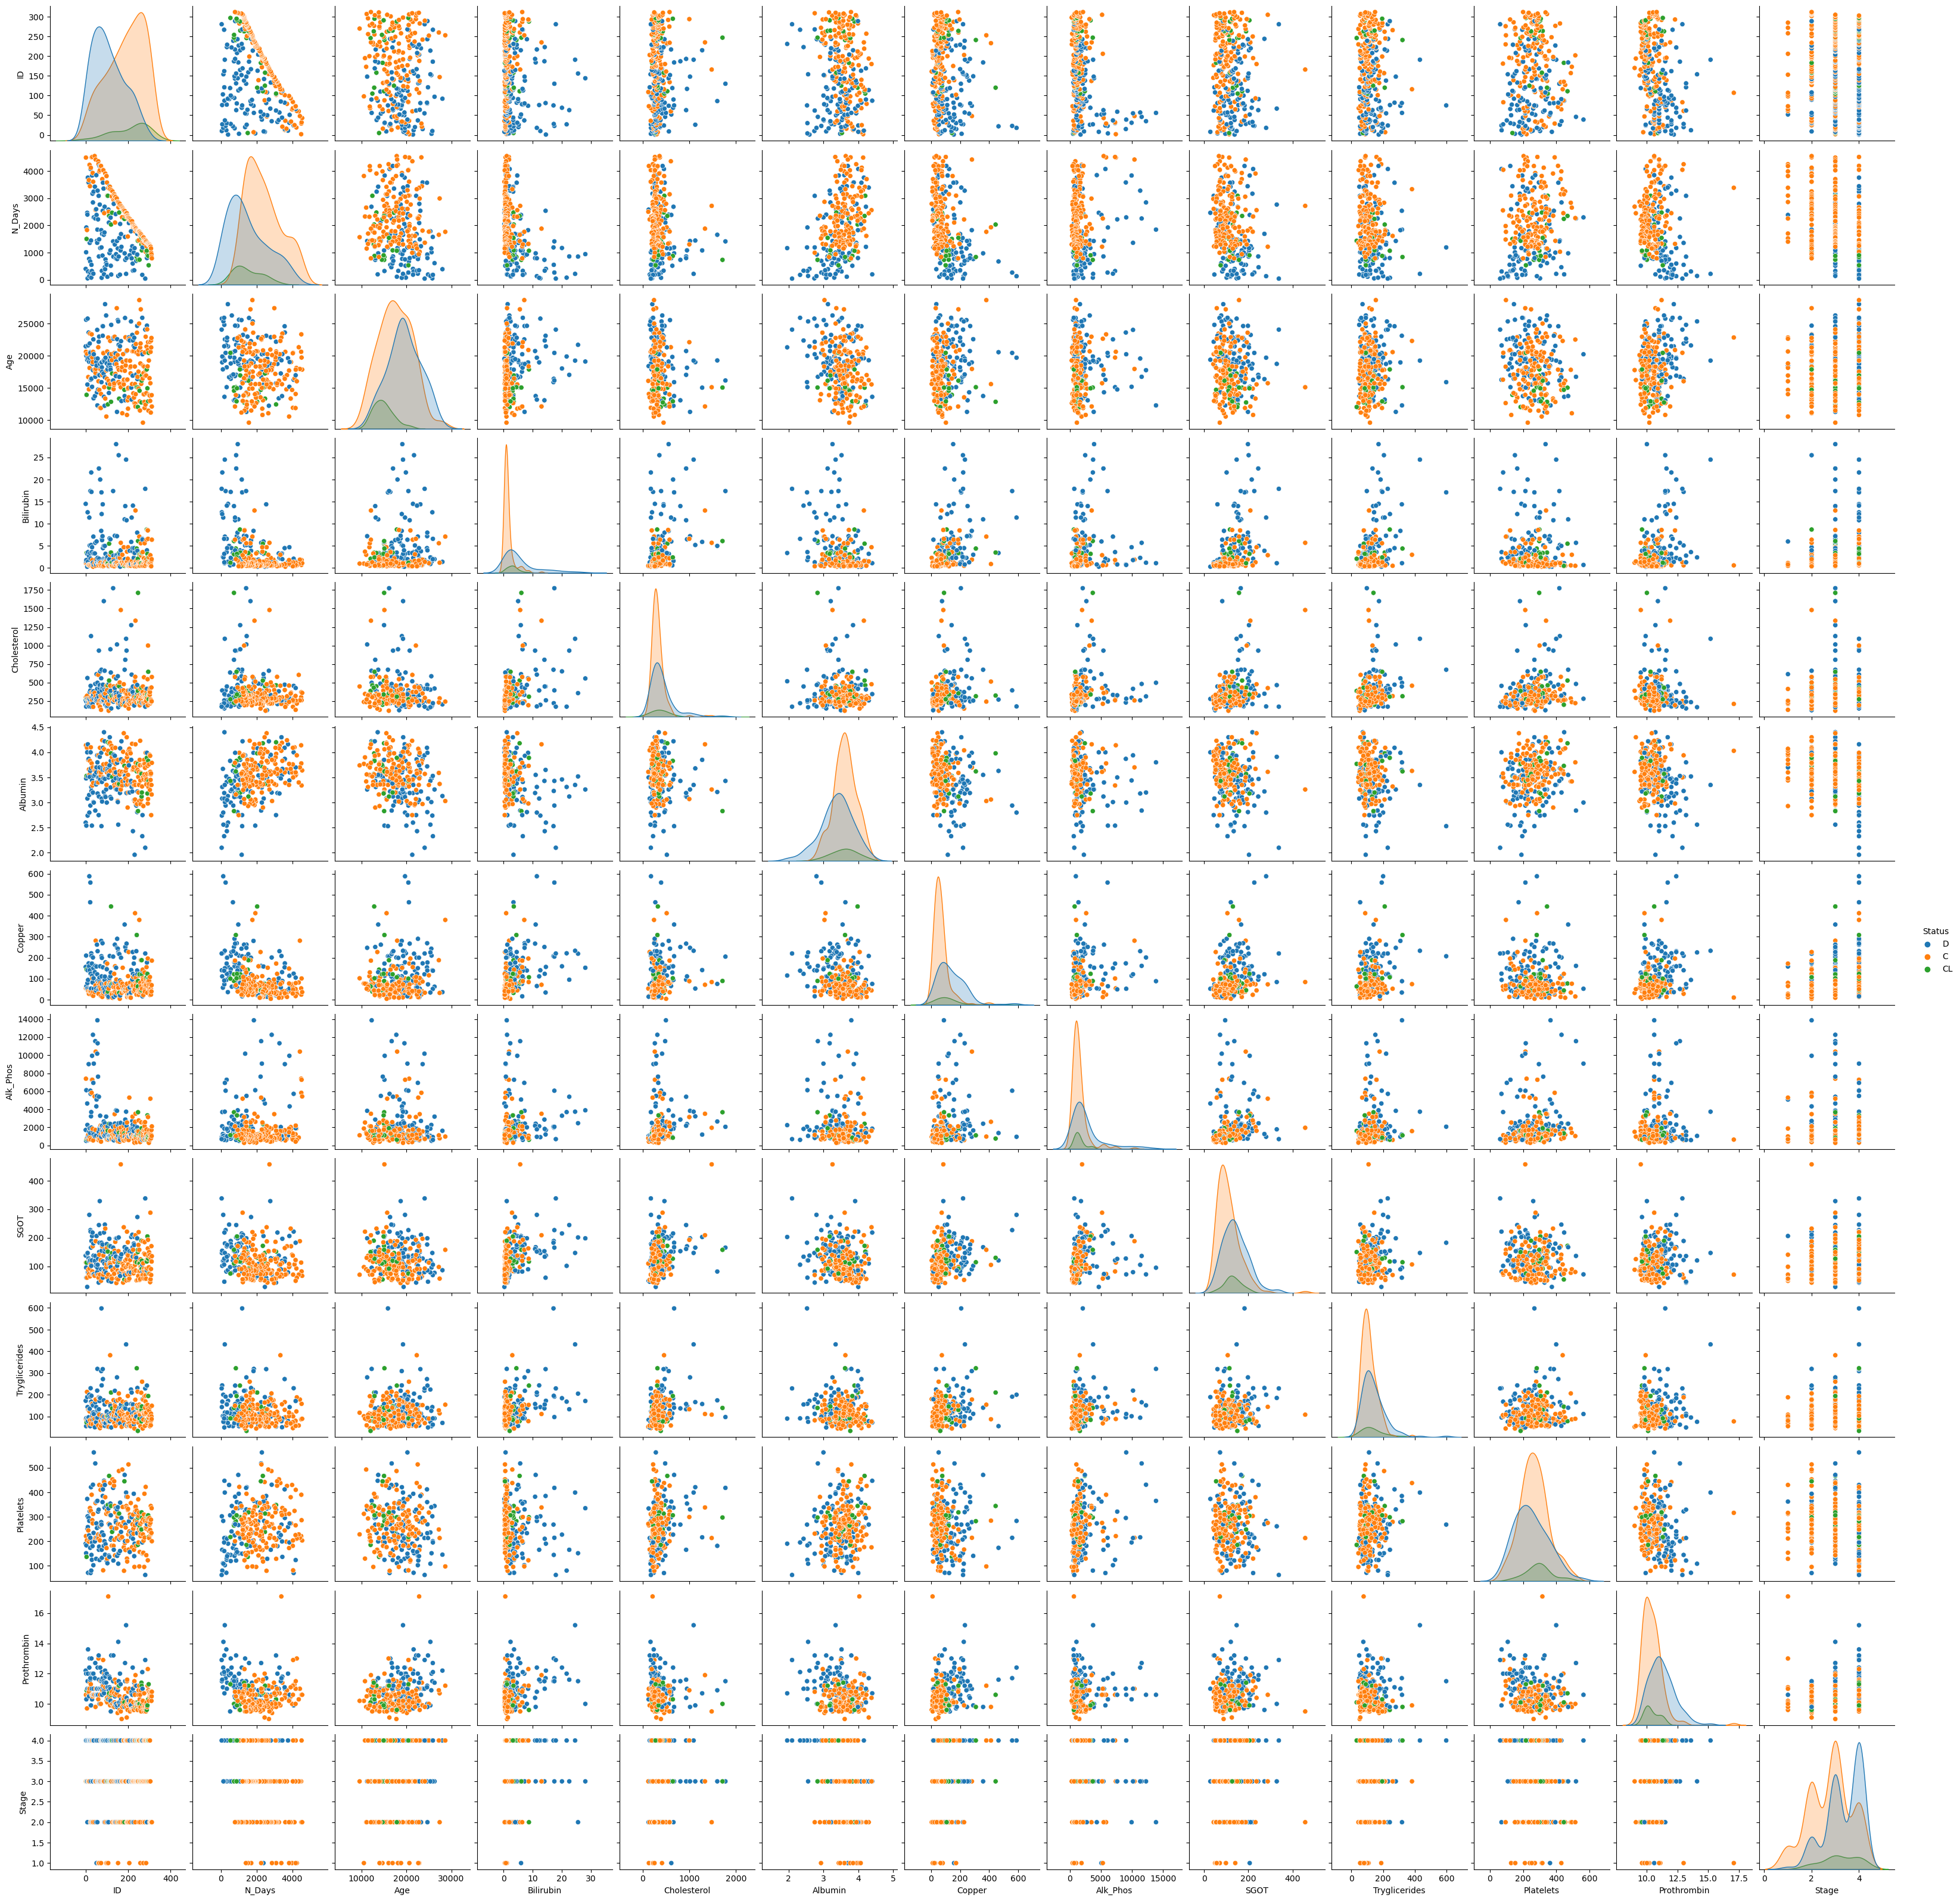

In [6]:
sns.pairplot(data, hue='Status')

In [7]:
plt.show()

In [8]:
data['Target'] = np.where(data['Status'] == 'D', 1, 0)

In [9]:
X = data.drop(['ID', 'Status', 'Target'], axis=1)
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [12]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [13]:
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8571428571428571


In [14]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[30  0]
 [ 8 18]]


In [15]:

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        30
           1       1.00      0.69      0.82        26

    accuracy                           0.86        56
   macro avg       0.89      0.85      0.85        56
weighted avg       0.89      0.86      0.85        56

